In [1]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

from pycocotools.coco import COCO
import random
from PIL import Image

In [2]:
# Convert to JPG from source
#images = convert_from_path('../../data/primary_sources/istat94_tav3.pdf')

#for count, image in enumerate(images):
#    image.save(f'../../data/primary_sources/istat94_tav3_{count}.jpg', 'JPEG')

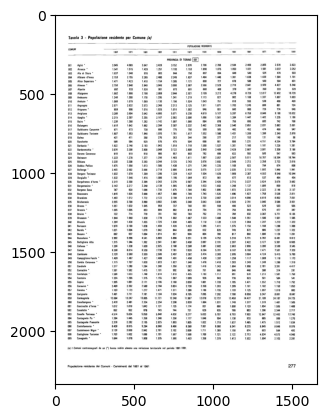

In [3]:
image = cv2.imread('../../data/primary_sources/istat94_tav3_0.jpg')
plt.imshow(image);

image = image[..., ::-1]

In [5]:
#interpolation_method = Image.Resampling.BILINEAR if hasattr(Image, 'Resampling') else Image.BILINEAR
model = lp.Detectron2LayoutModel(
            config_path ='lp://TableBank/faster_rcnn_R_101_FPN_3x/config', # In model catalog
            label_map   ={0: "Table"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [6]:
layout = model.detect(image)

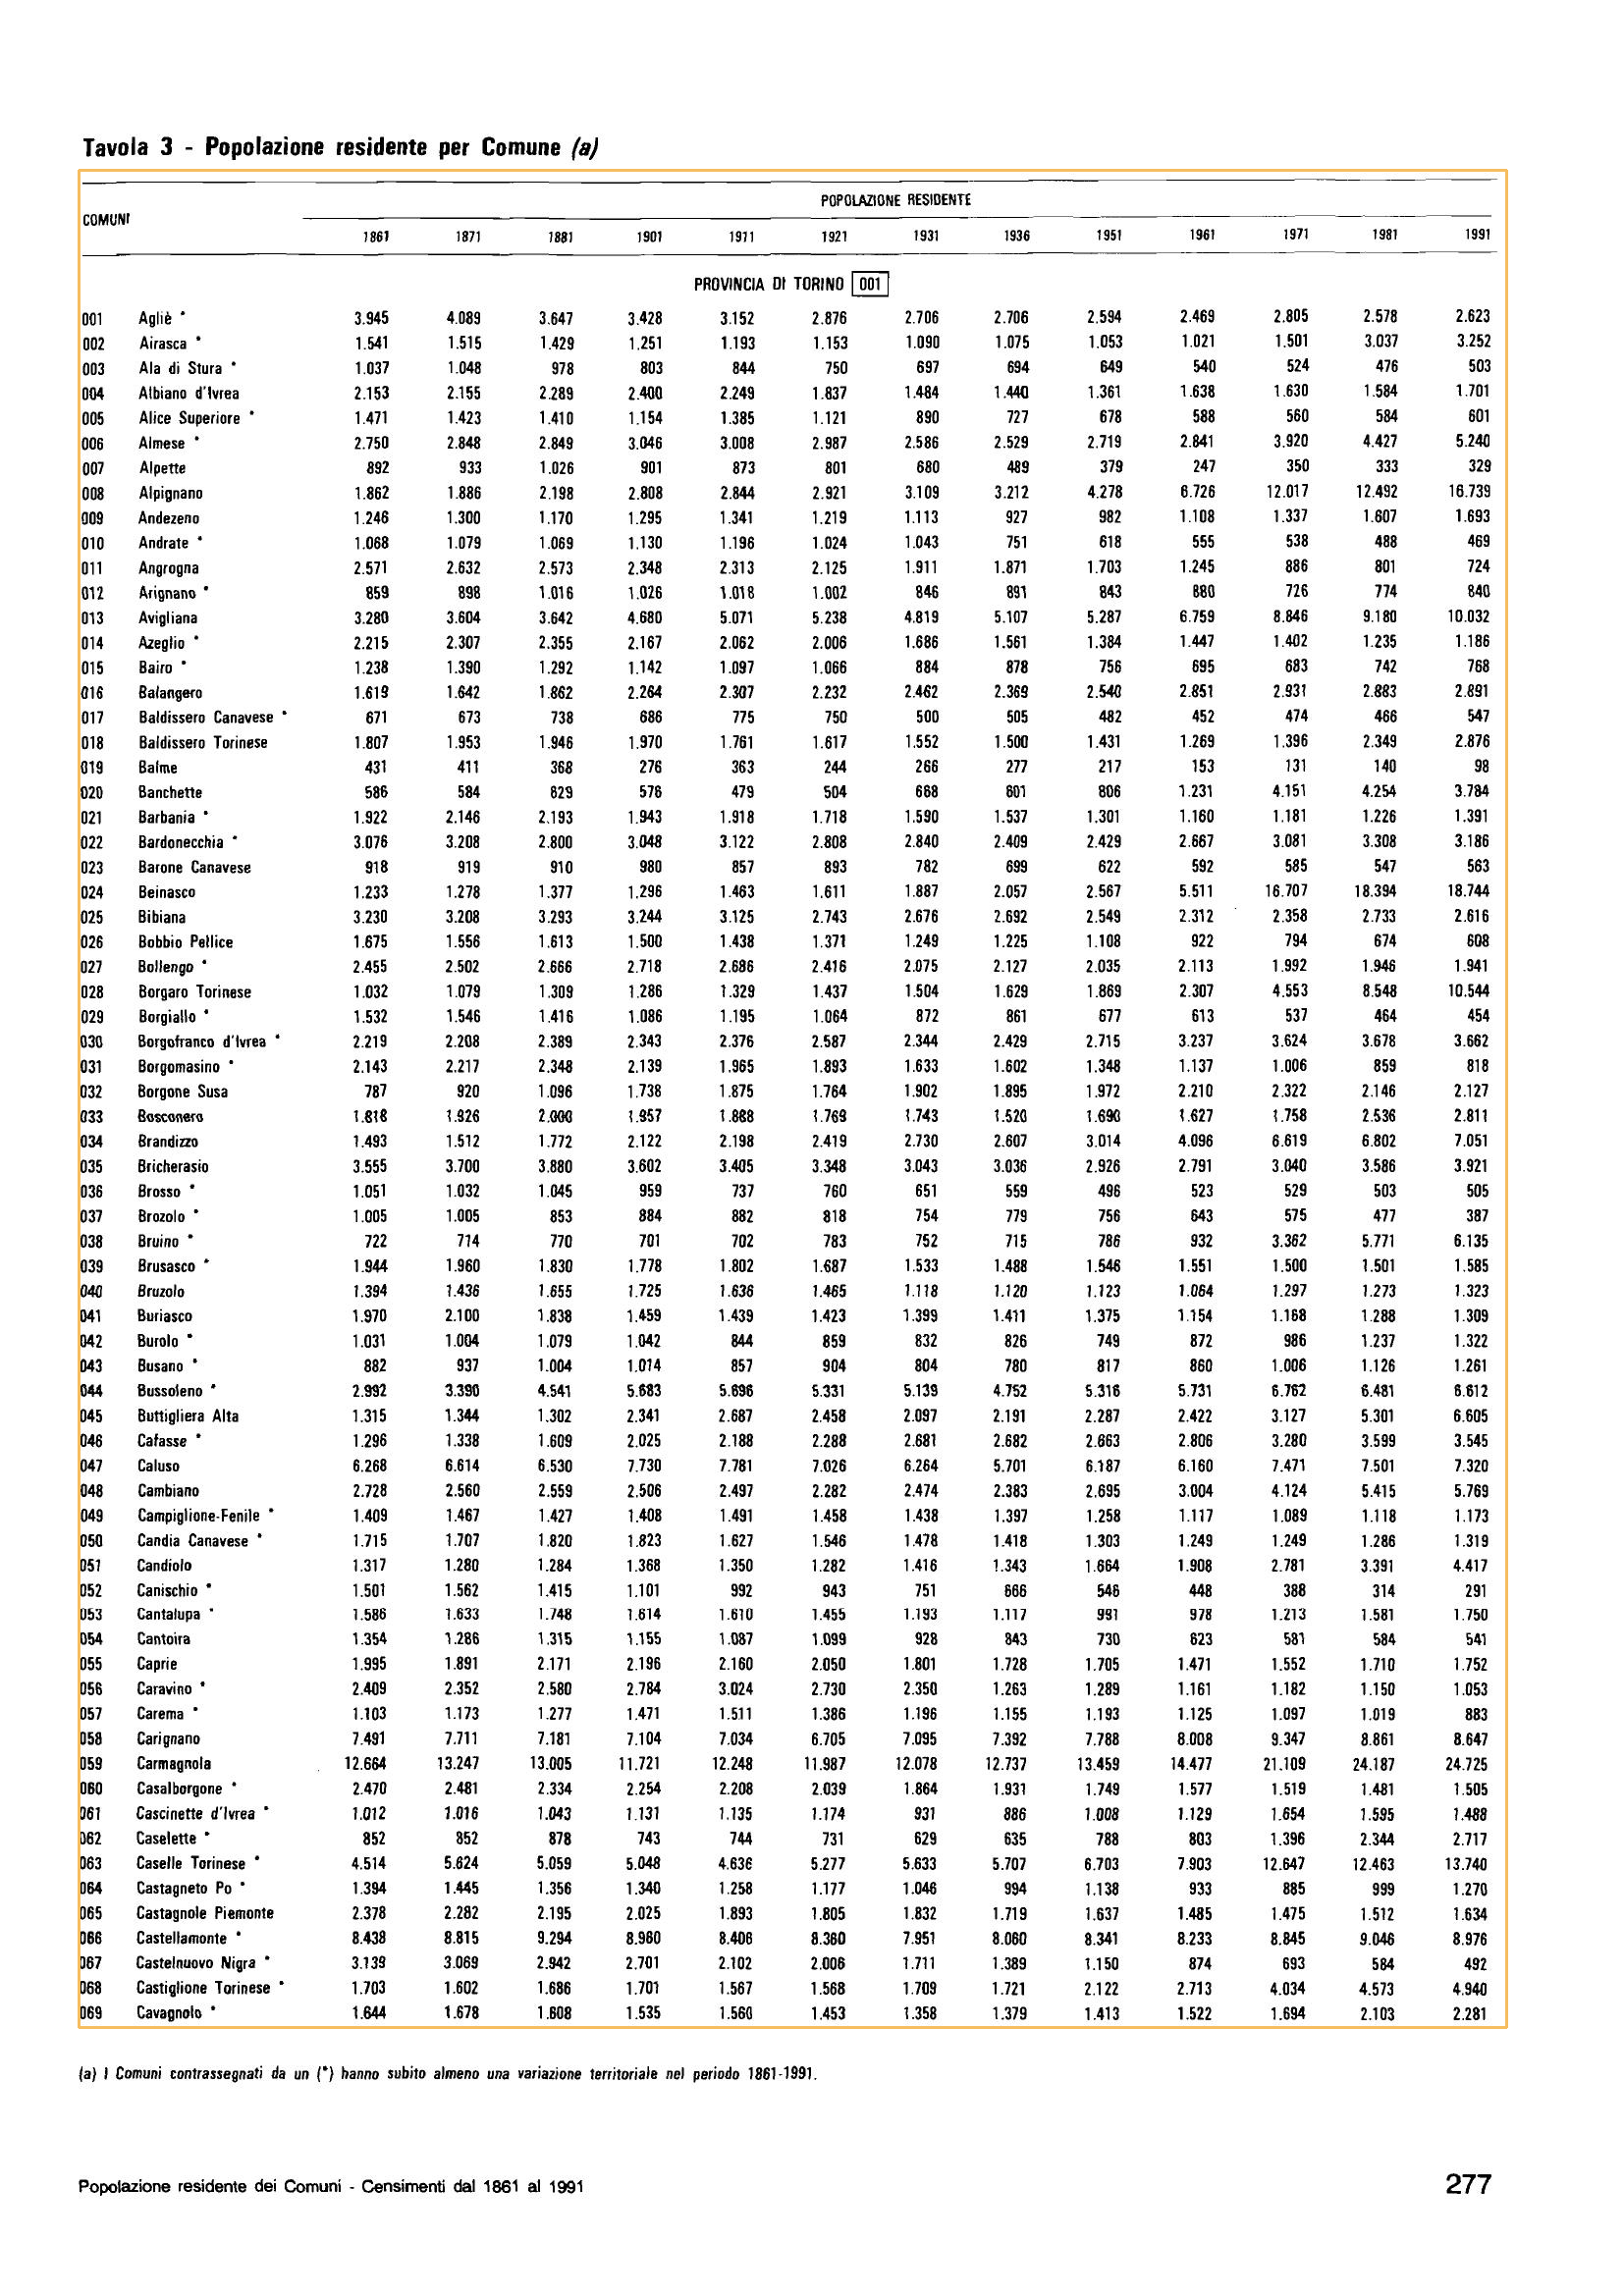

In [7]:
lp.draw_box(image, layout, box_width=3)

In [8]:
table_block = lp.Layout([b for b in layout if b.type=='Table'])

table_block

Layout(_blocks=[TextBlock(block=Rectangle(x_1=80.14276123046875, y_1=173.15713500976562, x_2=1534.025390625, y_2=2065.660400390625), text=None, id=None, type=Table, parent=None, next=None, score=0.9965967535972595)], page_data={})

In [16]:
ocr_agent = lp.TesseractAgent(languages=['ita'])

In [17]:
for block in table_block:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [18]:
for txt in table_block.get_texts():
    print(txt, end='\n---\n')

POPOLAZIONE RESIDENTE

COMUNI

1861 1871 1881 1901 1911 1921 1931 1936 1951 1961 1971 1981 1991

PROVINCIA DI TORINO

001 Aglie* 3.965 4.089 3647 3428 3.182 2.876 2706 2706 2.594 2.469 2805 2598 2.623
002 Airasca * 1.541 1516 1429 1251 1.193 1.163 1090 1075 1.058 1021 1.501 3.097 3.252
003 Ala di Stura * 1.037 1.048 978 803 844 750 697 694 649 540 524 476 503
004 Albiano d'Ivrea 2153 2155 2.289 2.400 2.249 1.837 1484 1.440 1.361 1.638 1.630 1.584 1.701
005 Alice Superiore * 1471 1423 1410 1.154 1.385 1.121 890 72 678 588 560 584 601
006 Almese * 2.750 2.848 2.849 3.046 3.008 2.987 2.586 2.529 2.719 2.841 3.920 4.427 5.240
007 Alpette 892 933 1.026 901 873 801 680 489 378 247 350 333 329
008 Alpignano 1.882 1.886 2198 2808 2844 291 3109 322 4278 8726 12017 12492 16739
009 Andezeno 1.246 1,300 1.170 1.295 1.341 1.219 1.113 927 982 1.108 1.337 1.607 1.693
010 Andrate * 1,068 1.078 1.069 1.130 1.196 1.024 1043 751 618 555 538 488 469
OT Angrogna 2571 2.632 2573 2348 2313 2125 1911 187 1793

In [45]:
directory = '../../data/primary_sources/'
pattern = '*.jpg'  # Pattern to match

# Use glob to list all files matching the pattern
matching_files = glob.glob(os.path.join(directory, pattern))
pattern = re.compile(r'istat94_tav3_(\d+)\.jpg')

# Filter files where the number is 5 or greater
filtered_files = [file for file in matching_files if pattern.search(file)]
filtered_files.sort()

filtered_files[0]

'../../data/primary_sources/istat94_tav3_0.jpg'

In [46]:
chatgpt_csv(filtered_files[0])

,Province Name,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,Pdf
0,Agliè,3545,4088,3647,3428,3152,276,2594,2463,2805,2578,2623,istat94_tav3_0.jpg
1,Airasca,1547,1565,1749,1851,1831,1839,1850,1689,1645,1501,1532,istat94_tav3_0.jpg
2,Ala di Stura,1031,1018,1248,1205,1143,753,1047,1053,1042,974,1010,istat94_tav3_0.jpg
3,Albiano d'Ivrea,2153,2515,2278,2400,2249,1837,1484,1400,1381,1580,1504,istat94_tav3_0.jpg
4,Alice Superiore,1471,1423,1404,1194,1385,1871,880,729,678,588,641,istat94_tav3_0.jpg
5,Almese,2790,3482,2048,3046,3083,2807,2586,2589,2417,3200,3332,istat94_tav3_0.jpg
6,Alpette,592,603,619,601,700,828,688,423,579,641,549,istat94_tav3_0.jpg
7,Andezeno,1826,1388,1298,2188,2844,2321,3109,2212,2728,17260,14722,istat94_tav3_0.jpg
8,Arignano,1687,1800,1710,1305,1341,1219,1113,927,812,1337,1699,istat94_tav3_0.jpg
9,Avigliana,7958,6792,7053,7240,2318,1045,1941,781,978,585,883,istat94_tav3_0.jpg


In [12]:
for file in filtered_files[1:]:
    try:
        result = chatgpt_csv(file)
        print(f"Processed file: {file}")
    except Exception as e:
        print(f"Failed to process file: {file} with error: {e}")


Failed to process file: . with error: name 'encode_image' is not defined
Failed to process file: . with error: name 'encode_image' is not defined
Failed to process file: / with error: name 'encode_image' is not defined
Failed to process file: . with error: name 'encode_image' is not defined
Failed to process file: . with error: name 'encode_image' is not defined
Failed to process file: / with error: name 'encode_image' is not defined
Failed to process file: d with error: name 'encode_image' is not defined
Failed to process file: a with error: name 'encode_image' is not defined
Failed to process file: t with error: name 'encode_image' is not defined
Failed to process file: a with error: name 'encode_image' is not defined
Failed to process file: / with error: name 'encode_image' is not defined
Failed to process file: p with error: name 'encode_image' is not defined
Failed to process file: r with error: name 'encode_image' is not defined
Failed to process file: i with error: name 'encode_